# Fecha de entrega: 10/10/2022 (corresponde a última clase)

# Algoritmo de clasificación: HistGradientBoostingClassifier

# Diccionario

**BTC_multiple_indicators_fv**	

- **Date**: fecha en YYYY-MM-DD (object)
- **Price**: precio de cierre de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Open**: precio de apertura de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **High**: precio más alto de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Low**: precio más bajo de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- **Vol.**: volumen de BTC (Número de intercambios) en el día de la fecha (float) (Variable numérica continua)
- **Percentage_diff**: diferencia porcentual del precio de BTC en la fecha [x+1] con respecto a la fecha [x] (float) (Variable numérica continua) 
- **Target**: 1 indica que en el día de la fecha el precio de BTC subió, y 0 que el precio bajó (float) (Se la tratará como variable categórica)
- **ADOSC**: indica la fuerza de los movimientos de precios y la presión subyacente de compra y venta (float) (Variable numérica continua)
- **HT_DCPHASE**: Hilbert Transform - Dominant Cycle Phase (fase del ciclo dominante en una barra específica entre 0 a 360 grados dentro del período de transformada de Hilbert actual medido instantáneamente en esa barra) (grados) (float) (Variable numérica continua)
- **HT_SINE_sine**: Hilbert Transform - SineWave (-1 a 1) (float) (Variable numérica continua)
- **HT_PHASOR_leadsine**: Hilbert Transform seno del lead (-1 a 1) (float) (Variable numérica continua)
- **ATR**: valores del indicador Average True Range (Promedio de Rango Verdadero) (float) (Variable numérica continua)
- **Linearregression**: precio estimado por regresión lineal (USD) (float) (Variable numérica continua)
- **Linearangle**: ángulo de la mejor línea de regresión (ángulos) (float) (Variable numérica continua)
- **Linearintercept**: intercepción de la regresión lineal (USD) (float) (Variable numérica continua)
- **Linearslope**: curvatura de la regresión lineal (grados) (float) (Variable numérica continua)
- **VAR**: varianza (medida de dispersión definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media) (float) (Variable numérica continua)
- **STDDEV**: desviación estándar (medición de la dispersión de los datos) (float) (Variable numérica continua)
- **Trend**: tendencia de la variable [Price] a lo largo de la serie de tiempo (float) (Variable numérica continua)
- **Seasonality**: estacionariedad de la variable [Price] a lo largo de la serie de tiempo (float) (Variable numérica continua)
- **Residuals**: residualidad de la variable [Price] a lo largo de la serie de tiempo (float) (Variable numérica continua)
- **BTC_cycle**: ciclicidad de la variable [Price] a lo largo de la serie de tiempo (float) (Variable numérica continua)

# Librerías

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.cm import ScalarMappable

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data acquisition

In [2]:
def gdriveColabPath(sharing_url):
  file_id=sharing_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?id=' + file_id
  return dwn_url

## Adquiriendo BTC_multiple_indicators_fv

In [3]:
# Se carga la base de datos de BTC_multiple_indicators_fv desde la carpeta compartida en el Google Drive
sharing_url = "https://drive.google.com/file/d/17dwqcGhoYCqLE5HWcu7TVT8lWB4lAjjT/view?usp=sharing"

In [4]:
dwn_url=gdriveColabPath(sharing_url)
BTC_multiple_indicators_fv_df = pd.read_csv(dwn_url, sep=";", decimal=".")
BTC_multiple_indicators_fv_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADOSC,ATR,Linearregression,Linearangle,Linearintercept,Linearslope,VAR,STDDEV,HT_DCPHASE,HT_SINE_sine,HT_PHASOR_leadsine,Trend,Seasonality,Residuals,BTC_cycle
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.979105,NaN,-1.869639e-06
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.917886,NaN,-1.538597e-06
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150686,NaN,-1.206386e-06
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,19.575231,-19.575231,-8.708768e-07
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.1,-15.128694,15.128694,-5.291847e-07


# Data wrangling

## Análisis pre-modelado

In [5]:
# Registros y columnas
BTC_multiple_indicators_fv_df.shape

(4386, 23)

In [6]:
# Nombre de columnas
BTC_multiple_indicators_fv_df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'ADOSC', 'ATR', 'Linearregression', 'Linearangle',
       'Linearintercept', 'Linearslope', 'VAR', 'STDDEV', 'HT_DCPHASE',
       'HT_SINE_sine', 'HT_PHASOR_leadsine', 'Trend', 'Seasonality',
       'Residuals', 'BTC_cycle'],
      dtype='object')

In [7]:
# Tipos de datos de las variables
BTC_multiple_indicators_fv_df.dtypes

Date                   object
Price                 float64
Open                  float64
High                  float64
Low                   float64
Vol.                  float64
Percentage_diff       float64
Target                  int64
ADOSC                 float64
ATR                   float64
Linearregression      float64
Linearangle           float64
Linearintercept       float64
Linearslope           float64
VAR                   float64
STDDEV                float64
HT_DCPHASE            float64
HT_SINE_sine          float64
HT_PHASOR_leadsine    float64
Trend                 float64
Seasonality           float64
Residuals             float64
BTC_cycle             float64
dtype: object

In [8]:
# Columnas y cantidad de registros
BTC_multiple_indicators_fv_df.count()

Date                  4386
Price                 4386
Open                  4386
High                  4386
Low                   4386
Vol.                  4386
Percentage_diff       4386
Target                4386
ADOSC                 4377
ATR                   4372
Linearregression      4373
Linearangle           4373
Linearintercept       4373
Linearslope           4373
VAR                   4382
STDDEV                4382
HT_DCPHASE            4323
HT_SINE_sine          4323
HT_PHASOR_leadsine    4323
Trend                 4380
Seasonality           4386
Residuals             4380
BTC_cycle             4386
dtype: int64

In [9]:
# Valores NaN
BTC_multiple_indicators_fv_df.isnull().sum()

Date                   0
Price                  0
Open                   0
High                   0
Low                    0
Vol.                   0
Percentage_diff        0
Target                 0
ADOSC                  9
ATR                   14
Linearregression      13
Linearangle           13
Linearintercept       13
Linearslope           13
VAR                    4
STDDEV                 4
HT_DCPHASE            63
HT_SINE_sine          63
HT_PHASOR_leadsine    63
Trend                  6
Seasonality            0
Residuals              6
BTC_cycle              0
dtype: int64

In [10]:
BTC_multiple_indicators_fv_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADOSC,ATR,Linearregression,Linearangle,Linearintercept,Linearslope,VAR,STDDEV,HT_DCPHASE,HT_SINE_sine,HT_PHASOR_leadsine,Trend,Seasonality,Residuals,BTC_cycle
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.979105,NaN,-1.869639e-06
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.917886,NaN,-1.538597e-06
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150686,NaN,-1.206386e-06
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,19.575231,-19.575231,-8.708768e-07
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.1,-15.128694,15.128694,-5.291847e-07


Observaciones:

Se observaron varios registros NaN en "BTC_multiple_indicators_fv.csv". 

Esto implica la necesidad de tomar una decisión con respecto a este tipo de valores (instancia previa al modelado). 

Se descarta rellenar los NaN con promedios de valores previos y/o posteriores por varias razones:

1. En las variables [Trend] y [Residuals], 3 de los 6 valores NaN se encuentran al principio de la serie, y los restantes 3 al final de la misma. Esto significa que no se puede hacer un promedio con valores anteriores y posteriores a los valores NaN sino solo con anteriores o posteriores según el caso. Proceder con un promedio con los datos anteriores o posteriores en una serie de tiempo supone un problema extra (¿cuántos valores hacia atrás o hacia adelante se deben tomar?, ¿cuál es el grado de autocorrelación con los valores anteriores o posteriores?, entre otros). 


2. En la variable [Residuals] hay valores positivos y negativos en los registros anteriores y posteriores inmediatos según el caso. Esto también añade un problema extra (¿qué signo se debería utilizar si se rellenan esos casilleros?).


3. Al no tratarse de un problema de regresión lineal del valor que tomaría el precio de BTC en el registro siguiente sino un problema de clasificación, la eliminación de los valores NaN no afectaría en demasía la predicción del modelo a pesar de la autocorrelación referida en el punto 2. Si se considera eliminar los 12 registros NaN (6 en [Residual] y 6 en [Trend] ) se estaría solamente eliminando un (6*100/4386 =) 0.136 % de los datos. 


4. En el resto de los casos los valores NaN (tal como fue explicado oportunamente en cada notebook) se debe a la fórmula que se utilizó para calcular cada una de las variables, por lo tanto, no se pueden rellenar con valores algunos.

Dado que el modelo HistGradientBoostingClassifier() puede procesar valores NaN se dejarán los mismos en la base de datos.

## Ultimas manipulaciones pre-modelado

Se reindexa el data set que se modelará a fin de que la variable [Date] funcione como nuevo índice de la base de datos.

In [11]:
# Se crea una copia de BTC_multiple_indicators_fv_df con nombre BTC_multiple y se la reindexa con la variable [Date] como nuevo índice
BTC_multiple = BTC_multiple_indicators_fv_df.set_index("Date")

In [12]:
BTC_multiple.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADOSC,ATR,Linearregression,Linearangle,Linearintercept,Linearslope,VAR,STDDEV,HT_DCPHASE,HT_SINE_sine,HT_PHASOR_leadsine,Trend,Seasonality,Residuals,BTC_cycle
Date,,,,,,,,,,,,,,,,,,,,,,
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,1,38511.511976,1166.898729,20802.237143,88.315816,20360.105714,34.010110,4.057132e+05,636.956216,188.760909,-0.152312,-0.806557,21370.371429,-0.183737,-160.287691,-154.061979
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,0,7776.544982,1147.777391,20673.194286,-64.096744,20699.962857,-2.059121,9.871333e+04,314.186781,208.648545,-0.479436,-0.959553,21784.528571,-3.979105,-994.949467,-745.841392
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1,66185.614950,1204.671863,21078.882857,88.362015,20624.274286,34.969890,4.892406e+05,699.457371,217.212389,-0.604771,-0.990777,NaN,8.917886,NaN,822.393782
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,1,150988.804515,1274.016730,21643.817143,89.338511,20517.854286,86.612527,1.087067e+06,1042.625182,222.679567,-0.677898,-0.999180,NaN,1.150686,NaN,1532.500614
2022-07-20,23149.1,23412.0,23429.9,22965.9,290210.0,-1.12,0,152531.617704,1216.158392,22101.408571,89.554376,20429.977143,128.571648,1.090209e+06,1044.130891,170.267628,0.169046,-0.577396,NaN,19.575231,NaN,1096.422183


Dado que en la práctica real solo se tiene hasta los valores del registro anterior al que se quiere predecir se intenta hacer un shift (-1) a la variable [Target]. Se entiende que así (en caso de que el modelo prediga con previsibilidad suficiente) se podría estar seguro de que después vendría el valor de [Target] original sin shift (-1).

In [13]:
# Se genera un back up
BTC_multiple_2 = BTC_multiple.copy()

In [14]:
# Se realiza el shift 
BTC_multiple_2 ["Target"] = BTC_multiple ["Target"].shift(-1)

In [15]:
BTC_multiple_2.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,ADOSC,ATR,Linearregression,Linearangle,Linearintercept,Linearslope,VAR,STDDEV,HT_DCPHASE,HT_SINE_sine,HT_PHASOR_leadsine,Trend,Seasonality,Residuals,BTC_cycle
Date,,,,,,,,,,,,,,,,,,,,,,
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,0.0,38511.511976,1166.898729,20802.237143,88.315816,20360.105714,34.010110,4.057132e+05,636.956216,188.760909,-0.152312,-0.806557,21370.371429,-0.183737,-160.287691,-154.061979
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,1.0,7776.544982,1147.777391,20673.194286,-64.096744,20699.962857,-2.059121,9.871333e+04,314.186781,208.648545,-0.479436,-0.959553,21784.528571,-3.979105,-994.949467,-745.841392
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,66185.614950,1204.671863,21078.882857,88.362015,20624.274286,34.969890,4.892406e+05,699.457371,217.212389,-0.604771,-0.990777,NaN,8.917886,NaN,822.393782
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,0.0,150988.804515,1274.016730,21643.817143,89.338511,20517.854286,86.612527,1.087067e+06,1042.625182,222.679567,-0.677898,-0.999180,NaN,1.150686,NaN,1532.500614
2022-07-20,23149.1,23412.0,23429.9,22965.9,290210.0,-1.12,NaN,152531.617704,1216.158392,22101.408571,89.554376,20429.977143,128.571648,1.090209e+06,1044.130891,170.267628,0.169046,-0.577396,NaN,19.575231,NaN,1096.422183


Se elimina el registro NaN de la variable [Target] dado que los modelos no pueden procesar este tipo de datos

In [16]:
BTC_multiple_2 = BTC_multiple_2 [0:4385]

In [17]:
BTC_multiple_2.isnull().sum()

Price                  0
Open                   0
High                   0
Low                    0
Vol.                   0
Percentage_diff        0
Target                 0
ADOSC                  9
ATR                   14
Linearregression      13
Linearangle           13
Linearintercept       13
Linearslope           13
VAR                    4
STDDEV                 4
HT_DCPHASE            63
HT_SINE_sine          63
HT_PHASOR_leadsine    63
Trend                  5
Seasonality            0
Residuals              5
BTC_cycle              0
dtype: int64

# Modelado ((HistGradientBoostingClassifier)

**...Recordando que...**

*Objetivo general del proyecto*

I.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50%) el dinamismo del precio de Bitcoin en el corto plazo, es decir, si el precio de este criptoactivo subirá o bajará en la temporalidad estudiada (+1 día).

**Explicación**:

- En lo que sigue se procederá a realizar varios modelos supervisados de clasificación de tipo "HistGradientBoostingClassifier". 
- Estos serán configurados con diversos hiperparámetros a fin de encontrar el resultado más óptimo para este data set.
- La columna [Target] de BTC_multiple_2 será considerada su variable target.

## Modelo 1 (HistGradientBoostingClassifier -> sin eliminar valores NaN)

Para más información sobre el Histogram-based Gradient Boosting Classification Tree ---> 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html

In [18]:
# Se separa X e y

# Se elimina del data set la variable a predecir
X = BTC_multiple_2.drop("Target", axis=1) 

# Se define la variable Target
y = BTC_multiple_2.Target

In [19]:
# Se asigna un 30% de datos para el test y un 70% de datos para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
# Se importa la librería correspondiente
from sklearn.ensemble import HistGradientBoostingClassifier

# Se crea y entrena el modelo
Dt = HistGradientBoostingClassifier().fit(X_train, y_train)

In [21]:
# Se busca conocer el resultado del modelo
Dt.score(X_train, y_train)

0.9485174323884001

In [22]:
# Se obtiene la predicción en Train
y_train_pred = Dt.predict(X_train) 

# Se obtiene la predicción en Test
y_test_pred = Dt.predict(X_test)

In [23]:
# Se calcula el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Se calcula el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9485174323884001
% de aciertos sobre el set de evaluación: 0.7120060790273556


Observación:
- El modelo reacciona con un nivel de predicción de approx. 71% pero presenta overfitting (la reducción de 94.8% a 71.2% de aciertos lo demuestra).

[[498 201]
 [178 439]]


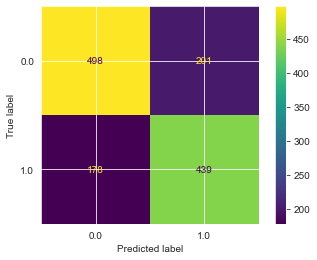

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Predicciones
predictions = Dt.predict(X_test)

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(Dt, X_test, y_test)
plt.show()

Observaciones:
- El modelo clasifica propocionalmente más falsos positivos que negativos.

Accuracy of the classifier is: 0.7120060790273556
Precision Score of the classifier is: 0.6859375
Recall Score of the classifier is: 0.7115072933549432
F1 Score of the classifier is: 0.6984884645982498
AUC for our classifier is: 0.7969569864798752


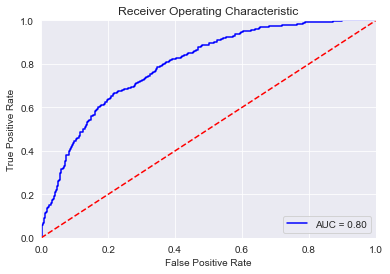

In [25]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = Dt.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Es un modelo que acierta el 71 % de los casos (aprox).
- Es un modelo que detecta el 71 % de los casos de los positivos reales (Recall).

## Hypertunning

In [26]:
HGBC = HistGradientBoostingClassifier()

Se contruye la grilla de RandomizedSearchCV.

In [28]:
# Se definelos hyperparámetros
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'loss':['log_loss', 'auto', 'binary_crossentropyv', 'categorical_crossentropy'],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [100,1000],
              'max_leaf_nodes': [1,15,31,65,90,150],
              'l2_regularization': [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50,100, 1000],
              'warm_start': [False],
              'random_state': np.arange(1,3000,1)}

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(HGBC, param_grid, n_iter=100, cv=5, verbose=2)

In [29]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END l2_regularization=10, learning_rate=0.1, loss=categorical_crossentropy, max_iter=1000, max_leaf_nodes=1, random_state=1212, warm_start=False; total time=   0.0s
[CV] END l2_regularization=10, learning_rate=0.1, loss=categorical_crossentropy, max_iter=1000, max_leaf_nodes=1, random_state=1212, warm_start=False; total time=   0.0s
[CV] END l2_regularization=10, learning_rate=0.1, loss=categorical_crossentropy, max_iter=1000, max_leaf_nodes=1, random_state=1212, warm_start=False; total time=   0.0s
[CV] END l2_regularization=10, learning_rate=0.1, loss=categorical_crossentropy, max_iter=1000, max_leaf_nodes=1, random_state=1212, warm_start=False; total time=   0.0s
[CV] END l2_regularization=10, learning_rate=0.1, loss=categorical_crossentropy, max_iter=1000, max_leaf_nodes=1, random_state=1212, warm_start=False; total time=   0.0s
[CV] END l2_regularization=5, learning_rate=0.0001, loss=categorical_crossentropy, max_

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_iter=100,
                   param_distributions={'l2_regularization': [0, 1e-05, 0.0001,
                                                              0.001, 0.01, 0.1,
                                                              1, 5, 10, 50, 100,
                                                              1000],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropyv',
                                                 'categorical_crossentropy'],
                                        'max_iter': [100, 1000],
                                        'max_leaf_nodes': [1, 15, 31, 65, 90,
                                                           150],
                                        'random_state': array([   1,    2,    3, ..., 2997, 2998, 2999]),
                                        'warm_start': [False]},
                   verbose=2)

In [30]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'warm_start': False, 'random_state': 1818, 'max_leaf_nodes': 15, 'max_iter': 1000, 'loss': 'auto', 'learning_rate': 0.01, 'l2_regularization': 0.1}
Mejor Score: 0.7090195599151925



In [31]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_random_state,param_max_leaf_nodes,param_max_iter,param_loss,param_learning_rate,param_l2_regularization,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
78,6.007635,0.037433,0.059360,0.006249,False,1818,15,1000,auto,0.01,0.1,"{'warm_start': False, 'random_state': 1818, 'max_leaf_nodes': 15, 'max_iter': 1000, 'loss': 'auto', 'learning_rate': 0.01, 'l2_regularization': 0.1}",0.706840,0.711726,0.716612,0.719870,0.690049,0.709020,0.010463,1
64,18.489167,0.169656,0.065608,0.006249,False,2916,150,1000,auto,0.01,50,"{'warm_start': False, 'random_state': 2916, 'max_leaf_nodes': 150, 'max_iter': 1000, 'loss': 'auto', 'learning_rate': 0.01, 'l2_regularization': 50}",0.711726,0.688925,0.697068,0.703583,0.686786,0.697618,0.009250,2
87,6.733433,0.175525,0.059360,0.006249,False,616,15,1000,auto,0.1,1000,"{'warm_start': False, 'random_state': 616, 'max_leaf_nodes': 15, 'max_iter': 1000, 'loss': 'auto', 'learning_rate': 0.1, 'l2_regularization': 1000}",0.710098,0.700326,0.697068,0.697068,0.683524,0.697617,0.008513,3
48,29.551958,0.327707,0.074983,0.018218,False,2,150,1000,auto,0.001,0.0001,"{'warm_start': False, 'random_state': 2, 'max_leaf_nodes': 150, 'max_iter': 1000, 'loss': 'auto', 'learning_rate': 0.001, 'l2_regularization': 0.0001}",0.697068,0.692182,0.701954,0.698697,0.694943,0.696969,0.003313,4
85,2.305716,0.020508,0.012497,0.006249,False,2086,65,100,auto,0.01,0.0001,"{'warm_start': False, 'random_state': 2086, 'max_leaf_nodes': 65, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 0.01, 'l2_regularization': 0.0001}",0.687296,0.692182,0.700326,0.701954,0.698206,0.695993,0.005465,5


In [32]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [33]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.7226443768996961


In [34]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[516 183]
 [182 435]]


Accuracy of the classifier is: 0.7226443768996961
Precision Score of the classifier is: 0.7038834951456311
Recall Score of the classifier is: 0.7050243111831442
F1 Score of the classifier is: 0.7044534412955465
AUC for our classifier is: 0.8019652988872735


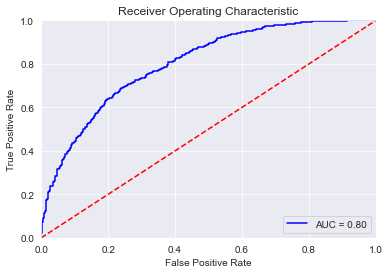

In [35]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Es un mejor modelo que el anterior (detecta mejor los verdaderos positivos y los verdaderos negativos). 

In [36]:
HGBC = HistGradientBoostingClassifier()

Se contruye una grilla más completa de RandomizedSearchCV.

In [37]:
# Se definelos hyperparámetros
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'loss':['log_loss', 'auto', 'binary_crossentropyv', 'categorical_crossentropy'],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [100,1000],
              'max_leaf_nodes': [1,15,31,65,90,150],
              'l2_regularization': [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50,100, 1000],
              'warm_start': [False, True],
              'random_state': np.arange(1,3000,1)}

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(HGBC, param_grid, n_iter=100, cv=5, verbose=2)

In [38]:
# Se asigna un 30% de datos para el test y un 70% de datos para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END l2_regularization=0.001, learning_rate=100, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=150, random_state=2077, warm_start=False; total time=   0.0s
[CV] END l2_regularization=0.001, learning_rate=100, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=150, random_state=2077, warm_start=False; total time=   0.0s
[CV] END l2_regularization=0.001, learning_rate=100, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=150, random_state=2077, warm_start=False; total time=   0.0s
[CV] END l2_regularization=0.001, learning_rate=100, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=150, random_state=2077, warm_start=False; total time=   0.0s
[CV] END l2_regularization=0.001, learning_rate=100, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=150, random_state=2077, warm_start=False; total time=   0.0s
[CV] END l2_regularization=0.001, learning_rate=1000, loss=auto, max_iter=1000, ma

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_iter=100,
                   param_distributions={'l2_regularization': [0, 1e-05, 0.0001,
                                                              0.001, 0.01, 0.1,
                                                              1, 5, 10, 50, 100,
                                                              1000],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropyv',
                                                 'categorical_crossentropy'],
                                        'max_iter': [100, 1000],
                                        'max_leaf_nodes': [1, 15, 31, 65, 90,
                                                           150],
                                        'random_state': array([   1,    2,    3, ..., 2997, 2998, 2999]),
                                        'warm_start': [False, True]},
                   verbose=2)

In [39]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'warm_start': True, 'random_state': 2537, 'max_leaf_nodes': 15, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 0.1, 'l2_regularization': 0.1}
Mejor Score: 0.702179700410753



In [40]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_random_state,param_max_leaf_nodes,param_max_iter,param_loss,param_learning_rate,param_l2_regularization,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
72,0.623387,0.008002,0.009373,0.007653,True,2537,15,100,auto,0.1,0.1,"{'warm_start': True, 'random_state': 2537, 'max_leaf_nodes': 15, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 0.1, 'l2_regularization': 0.1}",0.706840,0.684039,0.710098,0.718241,0.691680,0.702180,0.012504,1
3,0.634054,0.015327,0.013795,0.002310,False,2754,15,100,log_loss,0.1,0.00001,"{'warm_start': False, 'random_state': 2754, 'max_leaf_nodes': 15, 'max_iter': 100, 'loss': 'log_loss', 'learning_rate': 0.1, 'l2_regularization': 1e-05}",0.705212,0.693811,0.711726,0.706840,0.685155,0.700549,0.009681,2
58,0.627093,0.011522,0.009373,0.007653,True,2966,15,100,log_loss,0.1,0.00001,"{'warm_start': True, 'random_state': 2966, 'max_leaf_nodes': 15, 'max_iter': 100, 'loss': 'log_loss', 'learning_rate': 0.1, 'l2_regularization': 1e-05}",0.705212,0.693811,0.711726,0.706840,0.685155,0.700549,0.009681,2
80,12.388808,0.157058,0.062484,0.000001,False,2618,31,1000,log_loss,0.001,0.1,"{'warm_start': False, 'random_state': 2618, 'max_leaf_nodes': 31, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 0.001, 'l2_regularization': 0.1}",0.706840,0.682410,0.688925,0.705212,0.701468,0.696971,0.009615,4
30,11.762253,0.198681,0.062484,0.000001,False,1448,31,1000,log_loss,0.1,1000,"{'warm_start': False, 'random_state': 1448, 'max_leaf_nodes': 31, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 0.1, 'l2_regularization': 1000}",0.706840,0.695440,0.695440,0.705212,0.681892,0.696965,0.008915,5


In [41]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [42]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.729483282674772


In [43]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[521 178]
 [178 439]]


Accuracy of the classifier is: 0.729483282674772
Precision Score of the classifier is: 0.7115072933549432
Recall Score of the classifier is: 0.7115072933549432
F1 Score of the classifier is: 0.7115072933549431
AUC for our classifier is: 0.8009775483847034


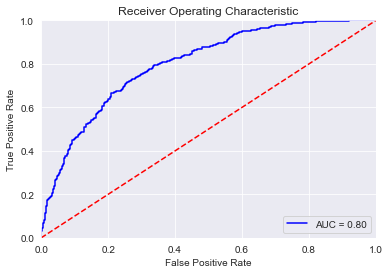

In [44]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Se obtuvo un mejor modelo que los anteriores (detecta mejor los verdaderos positivos y negativos).

Se construye otro modelos con otros tipos de hiperparámetros

In [45]:
HGBC = HistGradientBoostingClassifier()

In [47]:
# Se definelos hyperparámetros
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'loss':['log_loss', 'auto', 'binary_crossentropyv', 'categorical_crossentropy'],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [100,1000],
              'max_leaf_nodes': [1,15,31,65,90,150],
              'l2_regularization': [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50,100, 1000],
              'warm_start': [False, True],
              'random_state': np.arange(1,3000,1)}

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(HGBC, param_grid, n_iter=100, cv=5, verbose=2)

In [48]:
# Se asigna un 30% de datos para el test y un 70% de datos para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END l2_regularization=0, learning_rate=100, loss=binary_crossentropyv, max_iter=100, max_leaf_nodes=1, random_state=2546, warm_start=True; total time=   0.0s
[CV] END l2_regularization=0, learning_rate=100, loss=binary_crossentropyv, max_iter=100, max_leaf_nodes=1, random_state=2546, warm_start=True; total time=   0.0s
[CV] END l2_regularization=0, learning_rate=100, loss=binary_crossentropyv, max_iter=100, max_leaf_nodes=1, random_state=2546, warm_start=True; total time=   0.0s
[CV] END l2_regularization=0, learning_rate=100, loss=binary_crossentropyv, max_iter=100, max_leaf_nodes=1, random_state=2546, warm_start=True; total time=   0.0s
[CV] END l2_regularization=0, learning_rate=100, loss=binary_crossentropyv, max_iter=100, max_leaf_nodes=1, random_state=2546, warm_start=True; total time=   0.0s
[CV] END l2_regularization=50, learning_rate=10, loss=log_loss, max_iter=1000, max_leaf_nodes=150, random_state=2308, warm

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_iter=100,
                   param_distributions={'l2_regularization': [0, 1e-05, 0.0001,
                                                              0.001, 0.01, 0.1,
                                                              1, 5, 10, 50, 100,
                                                              1000],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropyv',
                                                 'categorical_crossentropy'],
                                        'max_iter': [100, 1000],
                                        'max_leaf_nodes': [1, 15, 31, 65, 90,
                                                           150],
                                        'random_state': array([   1,    2,    3, ..., 2997, 2998, 2999]),
                                        'warm_start': [False, True]},
                   verbose=2)

In [49]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'warm_start': False, 'random_state': 505, 'max_leaf_nodes': 150, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 0.01, 'l2_regularization': 5}
Mejor Score: 0.7177824922475422



In [50]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_random_state,param_max_leaf_nodes,param_max_iter,param_loss,param_learning_rate,param_l2_regularization,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
73,30.663941,0.255128,0.074981,6.248474e-03,False,505,150,1000,log_loss,0.01,5,"{'warm_start': False, 'random_state': 505, 'max_leaf_nodes': 150, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 0.01, 'l2_regularization': 5}",0.745014,0.703704,0.723647,0.703281,0.713267,0.717782,0.015523,1
44,2.371723,0.006021,0.015090,1.062369e-03,True,989,65,100,log_loss,0.1,0.001,"{'warm_start': True, 'random_state': 989, 'max_leaf_nodes': 65, 'max_iter': 100, 'loss': 'log_loss', 'learning_rate': 0.1, 'l2_regularization': 0.001}",0.732194,0.719373,0.709402,0.708987,0.701854,0.714362,0.010517,2
38,7.092786,0.085324,0.062484,6.217196e-07,False,2327,15,1000,auto,0.1,1000,"{'warm_start': False, 'random_state': 2327, 'max_leaf_nodes': 15, 'max_iter': 1000, 'loss': 'auto', 'learning_rate': 0.1, 'l2_regularization': 1000}",0.737892,0.705128,0.706553,0.718973,0.691869,0.712083,0.015499,3
28,2.374594,0.013360,0.006248,7.652611e-03,False,2575,65,100,auto,0.1,0.01,"{'warm_start': False, 'random_state': 2575, 'max_leaf_nodes': 65, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 0.1, 'l2_regularization': 0.01}",0.737892,0.707977,0.705128,0.713267,0.693295,0.711512,0.014725,4
45,13.423130,0.117444,0.062484,7.387129e-07,False,641,31,1000,log_loss,0.001,0.0001,"{'warm_start': False, 'random_state': 641, 'max_leaf_nodes': 31, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 0.001, 'l2_regularization': 0.0001}",0.740741,0.712251,0.680912,0.710414,0.706134,0.710090,0.019033,5


In [51]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [52]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6830102622576967


In [53]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[326 144]
 [134 273]]


Accuracy of the classifier is: 0.6830102622576967
Precision Score of the classifier is: 0.6546762589928058
Recall Score of the classifier is: 0.6707616707616708
F1 Score of the classifier is: 0.6626213592233011
AUC for our classifier is: 0.7726122641016258


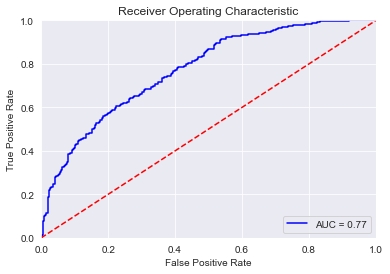

In [54]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (con respecto al modelo anterior). 

Se procede a nuevas pruebas: modificación de valores de la variable [Target]. Del valor 1 para [Percentage_difference] > 0, se paso a valor 1 para [Percentage_difference] > 0.2.

In [55]:
BTC_multiple_2.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff', 'Target',
       'ADOSC', 'ATR', 'Linearregression', 'Linearangle', 'Linearintercept',
       'Linearslope', 'VAR', 'STDDEV', 'HT_DCPHASE', 'HT_SINE_sine',
       'HT_PHASOR_leadsine', 'Trend', 'Seasonality', 'Residuals', 'BTC_cycle'],
      dtype='object')

In [56]:
BTC_multiple_2 = BTC_multiple_2.drop ("Target", axis=1)

In [57]:
# Se crea la columna [Target]
BTC_multiple_2 ["Target"] = BTC_multiple_2 ["Percentage_diff"]
BTC_multiple_2.loc[BTC_multiple_2.Percentage_diff>0.2, "Target"]=1
BTC_multiple_2.loc[BTC_multiple_2.Percentage_diff<=0.2, "Target"]=0

In [58]:
# Se realiza el shift 
BTC_multiple_2 ["Target"] = BTC_multiple_2 ["Target"].shift(-1)

In [59]:
BTC_multiple_2 = BTC_multiple_2.dropna()

In [60]:
HGBC = HistGradientBoostingClassifier()

Se contruye la grilla de RandomizedSearchCV.

In [61]:
# Se definelos hyperparámetros
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'loss':['log_loss', 'auto', 'binary_crossentropyv', 'categorical_crossentropy'],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [100,1000],
              'max_leaf_nodes': [1,15,31,65,90,150],
              'l2_regularization': [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50,100, 1000],
              'warm_start': [False, True],
              'random_state': np.arange(1,3000,1)}

# Se uitiliza la RandomizedSearchCV y se agrega Cross validation con k=5 
model = RandomizedSearchCV(HGBC, param_grid, n_iter=100, cv=5, verbose=2)

In [62]:
# Se separa X e y

# Se elimina del data set la variable a predecir
X = BTC_multiple_2.drop("Target", axis=1) 

# Se define la variable Target
y = BTC_multiple_2.Target

In [63]:
# Se asigna un 30% de datos para el test y un 70% de datos para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END l2_regularization=1, learning_rate=10, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=1, random_state=1357, warm_start=False; total time=   0.0s
[CV] END l2_regularization=1, learning_rate=10, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=1, random_state=1357, warm_start=False; total time=   0.0s
[CV] END l2_regularization=1, learning_rate=10, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=1, random_state=1357, warm_start=False; total time=   0.0s
[CV] END l2_regularization=1, learning_rate=10, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=1, random_state=1357, warm_start=False; total time=   0.0s
[CV] END l2_regularization=1, learning_rate=10, loss=binary_crossentropyv, max_iter=1000, max_leaf_nodes=1, random_state=1357, warm_start=False; total time=   0.0s
[CV] END l2_regularization=50, learning_rate=1000, loss=log_loss, max_iter=100, max_leaf_nodes=90, random_state=1178,

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_iter=100,
                   param_distributions={'l2_regularization': [0, 1e-05, 0.0001,
                                                              0.001, 0.01, 0.1,
                                                              1, 5, 10, 50, 100,
                                                              1000],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000],
                                        'loss': ['log_loss', 'auto',
                                                 'binary_crossentropyv',
                                                 'categorical_crossentropy'],
                                        'max_iter': [100, 1000],
                                        'max_leaf_nodes': [1, 15, 31, 65, 90,
                                                           150],
                                        'random_state': array([   1,    2,    3, ..., 2997, 2998, 2999]),
                                        'warm_start': [False, True]},
                   verbose=2)

In [64]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'warm_start': True, 'random_state': 1711, 'max_leaf_nodes': 31, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 0.001, 'l2_regularization': 0.001}
Mejor Score: 0.7096677795413497



In [65]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_random_state,param_max_leaf_nodes,param_max_iter,param_loss,param_learning_rate,param_l2_regularization,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
86,11.934290,0.114362,0.071856,0.018746,True,1711,31,1000,log_loss,0.001,0.001,"{'warm_start': True, 'random_state': 1711, 'max_leaf_nodes': 31, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 0.001, 'l2_regularization': 0.001}",0.723967,0.679339,0.679339,0.720661,0.745033,0.709668,0.026137,1
53,11.997913,0.184131,0.062484,0.000002,True,2138,31,1000,log_loss,0.001,0.0001,"{'warm_start': True, 'random_state': 2138, 'max_leaf_nodes': 31, 'max_iter': 1000, 'loss': 'log_loss', 'learning_rate': 0.001, 'l2_regularization': 0.0001}",0.723967,0.680992,0.679339,0.719008,0.741722,0.709006,0.024735,2
30,1.221281,0.007123,0.015621,0.000002,True,1111,31,100,auto,0.01,1,"{'warm_start': True, 'random_state': 1111, 'max_leaf_nodes': 31, 'max_iter': 100, 'loss': 'auto', 'learning_rate': 0.01, 'l2_regularization': 1}",0.725620,0.677686,0.682645,0.709091,0.745033,0.708015,0.025475,3
10,0.623756,0.014207,0.015622,0.000001,True,1659,15,100,log_loss,0.1,0.001,"{'warm_start': True, 'random_state': 1659, 'max_leaf_nodes': 15, 'max_iter': 100, 'loss': 'log_loss', 'learning_rate': 0.1, 'l2_regularization': 0.001}",0.717355,0.677686,0.677686,0.732231,0.718543,0.704700,0.022668,4
62,20.836606,0.427566,0.062484,0.000001,True,376,90,1000,auto,0.001,5,"{'warm_start': True, 'random_state': 376, 'max_leaf_nodes': 90, 'max_iter': 1000, 'loss': 'auto', 'learning_rate': 0.001, 'l2_regularization': 5}",0.722314,0.680992,0.684298,0.702479,0.728477,0.703712,0.019256,5


In [66]:
# Se ejecuta la predicción de resultados con X_test
predictions = model.predict(X_test)

In [67]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.6790123456790124


In [68]:
cm = confusion_matrix(y_test,predictions)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[508 185]
 [231 372]]


Accuracy of the classifier is: 0.6790123456790124
Precision Score of the classifier is: 0.6678635547576302
Recall Score of the classifier is: 0.6169154228855721
F1 Score of the classifier is: 0.6413793103448276
AUC for our classifier is: 0.7447550606754587


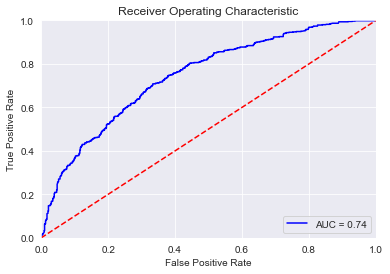

In [69]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- Al modelo le cuesta detectar las clases (con respecto a los anteriores).